# Foundations of Data Science
## Homework 5 

Student Name: Arnav Shah

Student Netid: ads798
***

### Part 1: Critique this plan (8 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```


1. How logistic regression is considered the best model by the Green Berry Consulting, Inc lacks sufficient information. More information should be provided on how they (Green Berry) consider logistic regression to be the best model.

2. The model can appear to have more predictive power than they actually do as a result of sampling bias.A logistic regression would therefore be "overfit," meaning that it overstates the accuracy of its predictions. The problem of overfitting can be solved by cross validation and regularization.

3. Logistic regression is a linear model. So nonlinearity can be solved by decision trees. Nonlinear relationships between parameters do not affect tree performance in Decision Trees. The dataset of Green Berry may be different and it might not contain all attributes which are needed. So a dataset should contain all information. 
 
 Accuracy can be determined by how well it predicts the target variable and not by how statistically significant are the attributes. So once the LR model predicts the users the users who can be most likely to subscribe ,further information can be aggregated from the users to determine the accuracy of the model.

4. Logistic Regression cannot be used for predicting continuous outcomes as it will affect the precision of the data set. Decision trees also allow for classification of data without computation, can handle both continuous and categorical variables, and provide a clear indication of the most important fields for prediction or classification, all unmatched features when comparing this model to other compatible models such as support vector or logistic regression. 



### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [184]:
import pandas as pd
dic={}
with open('/Users/arnavshah/Downloads/data.txt','r') as f:
    for line in f:
        index=line.find(":")
        key=line[0:index]
        if(key in dic.keys()):
            dic[key].append(line[index+1:len(line)-1])
        else:
            dic[key]=[]
            dic[key].append(line[index+1:len(line)-1])

df = pd.DataFrame.from_dict(dic)
df.head(10)


,,DAT,RES,SRC,TGT,TXT,VOT,YEA
0,,"23:13, 19 April 2013",1,Steel1943,BDD,'''Support''' as co-nom.,1,2013
1,,"01:04, 20 April 2013",1,Cuchullain,BDD,'''Support''' as nominator.--,1,2013
2,,"23:43, 19 April 2013",1,INeverCry,BDD,'''Support''' per noms.,1,2013
3,,"00:11, 20 April 2013",1,Cncmaster,BDD,'''Support''' per noms. BDD is a strong contri...,1,2013
4,,"00:56, 20 April 2013",1,Miniapolis,BDD,"'''Support''', with great pleasure. I work wit...",1,2013
5,,"01:53, 20 April 2013",1,Sven Manguard,BDD,'''Support''' There are plenty of important ro...,1,2013
6,,"02:00, 20 April 2013",1,Ramaksoud2000,BDD,'''Support''' per noms. I don't see a reason n...,1,2013
7,,"02:18, 20 April 2013",1,RockMagnetist,BDD,'''Support''' BDD already wields a broom pret...,1,2013
8,,"02:22, 20 April 2013",1,Carrite,BDD,'''Support''' barring a completely unexpected ...,1,2013
9,,"03:09, 20 April 2013",1,Someguy1221,BDD,'''Support''' because I see no good reason not...,1,2013


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [185]:
# df.loc[df["VOT"]==-1,"VOT"]=0
# df["VOT"].sum()

#df=df.replace(to_replace={'VOT':{'-1': 0}})
df.VOT.replace(['1', '0', '-1'], [1, 0, 0], inplace=True)
 

3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [186]:
from sklearn.cross_validation import train_test_split

X = df['TXT']
Y = df['VOT']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

binary_vectorizer = CountVectorizer(binary=True, ngram_range=(1,2), stop_words='english')
binary_vectorizer.fit(X_train)
X_train_binary = binary_vectorizer.transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 8

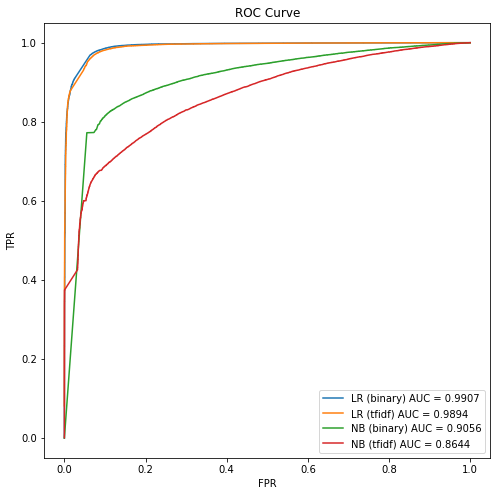

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

for model, model_label in [(LogisticRegression(), "LR"), (BernoulliNB(), "NB")]:
    for train, test, method in [(X_train_binary, X_test_binary, 'binary'), (X_train_tfidf, X_test_tfidf, 'tfidf')]:
        model.fit(train, Y_train)
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(test)[:,1])
        auc = metrics.roc_auc_score(Y_test, model.predict_proba(test)[:, 1])
        plt.plot(fpr, tpr, label=model_label + " (" + method + ") AUC = " + str(round(auc, 4)))
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
plt.legend()

Logistic Regression does a better job here. I think it really depends on problem though which method to prefer. I can’t find a reference now, but e.g. in classification, naive Bayes converges quicker but has typically a higher error than logistic regression. On small datasets you’d might want to try out naive Bayes, but as your training set size grows, you likely get better results with logistic regression.

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [190]:
import networkx as nx
import numpy as np
L=list()
df['SRC'].replace('', np.nan, inplace=True)
df.dropna(subset=['SRC'], inplace=True)
L=df['SRC'].tolist()
len(L)
M=list()
M=df['TGT'].tolist()
L.extend(M)
L
c=set(L)
c
len(c)




df["SRC"] = df["SRC"].astype('category')
df["TGT"] = df["TGT"].astype('category')

df.dtypes
df["SRC1"] = df["SRC"].cat.codes
df["TGT1"] = df["TGT"].cat.codes
df
# df = df.replace(",", " ")

df1 = pd.DataFrame(columns=['SRC1','TGT1','VOT'])
df1['SRC1']=df['SRC1']
df1['TGT1']=df['TGT1']
df1['VOT']=df['VOT']
df1
# with open('/Users/arnavshah/Downloads/abc.txt', 'w') as out:
#     for row in df1:
#         out.write(row)
df1.to_csv(path_or_buf='/Users/arnavshah/Downloads/da.txt', sep=' ',index=False,header=False)



2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [191]:

import networkx as nx
import numpy as np
# g=nx.Graph()
# g=nx.read_edgelist('/Users/arnavshah/Downloads/da.txt',comments='#',create_using=nx.Graph(), 
#  delimiter=' ',nodetype=int,data=True,edgetype=None,encoding='utf-8')

Gwik=nx.read_edgelist('/Users/arnavshah/Downloads/da.txt', create_using=nx.Graph(),nodetype=int, data=(('weight',int),))

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [192]:
print(nx.info(Gwik))
Gwik.number_of_edges()
Gwik.number_of_nodes()


Name: 
Type: Graph
Number of nodes: 10437
Number of edges: 187916
Average degree:  36.0096


10437

4\. Compute the degree, betweneess and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [193]:
nx.degree_centrality(Gwik)

{8540: 0.0003832886163280951,
 269: 0.013319279417401304,
 2049: 0.0037370640091989272,
 4116: 0.002203909543886547,
 1863: 0.013319279417401304,
 6008: 0.004120352625527022,
 8695: 0.009294748945956305,
 7398: 0.0005749329244921426,
 7667: 0.0004791107704101189,
 1597: 0.01092372556535071,
 8380: 0.005461862782675355,
 8026: 0.021272518206209276,
 2418: 0.011019547719432733,
 5523: 0.0036412418551169034,
 5035: 0.02443464929091606,
 3597: 0.004982752012265236,
 3812: 0.004886929858183212,
 8741: 0.0032579532387888082,
 5801: 0.018781142200076657,
 7178: 0.002395553852050594,
 3161: 0.008719816021464164,
 6612: 0.004695285550019164,
 8285: 0.028555001916443085,
 2690: 0.0011498658489842851,
 1210: 0.01092372556535071,
 2217: 0.0015331544653123803,
 7601: 0.0013415101571483327,
 1248: 0.032579532387888084,
 8092: 0.014564967420467614,
 9215: 0.000862399386738214,
 6490: 0.000862399386738214,
 6424: 0.04522805672671522,
 1529: 0.004982752012265236,
 6194: 0.0026830203142966655,
 9840: 0.

In [182]:
nx.betweenness_centrality(Gwik)

{8540: 7.07129856960181e-08,
 269: 0.0012550779696880118,
 2049: 5.740861706353271e-05,
 4116: 5.341353169239547e-06,
 1863: 0.0016222266141207745,
 6008: 3.48615830611982e-05,
 8695: 0.00019089607498742607,
 7398: 1.4716573430263685e-06,
 7667: 1.751856053237165e-07,
 1597: 0.000627605782410402,
 8380: 6.508357652356629e-05,
 8026: 0.001507624297144481,
 2418: 0.0008440686402752177,
 5523: 2.2695777689153993e-05,
 5035: 0.0023709065996566276,
 3597: 6.978434890399876e-05,
 3812: 4.5918654694880194e-05,
 8741: 2.313721007462312e-05,
 5801: 0.0006365349350403234,
 7178: 8.21134546237609e-06,
 3161: 0.0013504463095324161,
 6612: 4.073295766805964e-05,
 8285: 0.004812726082703922,
 2690: 2.722192701350949e-05,
 1210: 0.0008253673613423331,
 2217: 6.0835625854752994e-05,
 7601: 5.070822410092938e-06,
 1248: 0.00324162916891725,
 8092: 0.0005014361726595492,
 9215: 1.3421864264380917e-06,
 6490: 9.699913426615983e-07,
 6424: 0.008561709936965754,
 1529: 0.0006958653916456088,
 6194: 1.45010

In [183]:

nx.closeness_centrality(Gwik)

{8540: 0.2807942743367594,
 269: 0.36996596710153146,
 2049: 0.33674292536542866,
 4116: 0.308010152883537,
 1863: 0.3812933869199854,
 6008: 0.32438144970782046,
 8695: 0.3504365345869711,
 7398: 0.2936161832146977,
 7667: 0.28263460080164665,
 1597: 0.36737423874397157,
 8380: 0.335217782346139,
 8026: 0.39633891610649047,
 2418: 0.3707941019719311,
 5523: 0.3211373357540696,
 5035: 0.40970477386934673,
 3597: 0.3266047006540857,
 3812: 0.3253421454624809,
 8741: 0.32020127638684337,
 5801: 0.39676082576132,
 7178: 0.31280160657015255,
 3161: 0.3693636299285057,
 6612: 0.3286204616305067,
 8285: 0.42321262013869176,
 2690: 0.29782255072629205,
 1210: 0.3775550812199269,
 2217: 0.32063414034656507,
 7601: 0.30423881989388374,
 1248: 0.4044804464943219,
 8092: 0.3843122813478181,
 9215: 0.29553692795650205,
 6490: 0.2940546632854325,
 6424: 0.43572293432424536,
 1529: 0.35621394682049357,
 6194: 0.31594562683539706,
 9840: 0.300083388446387,
 5646: 0.3093339656756677,
 2498: 0.37093907

Degree centrality is meaningful here.
Betweenness centrality is not so meaningful in the context mentioned here.
Closeness centrality is also not so meaningful in the context mentioned here.

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (1 point)

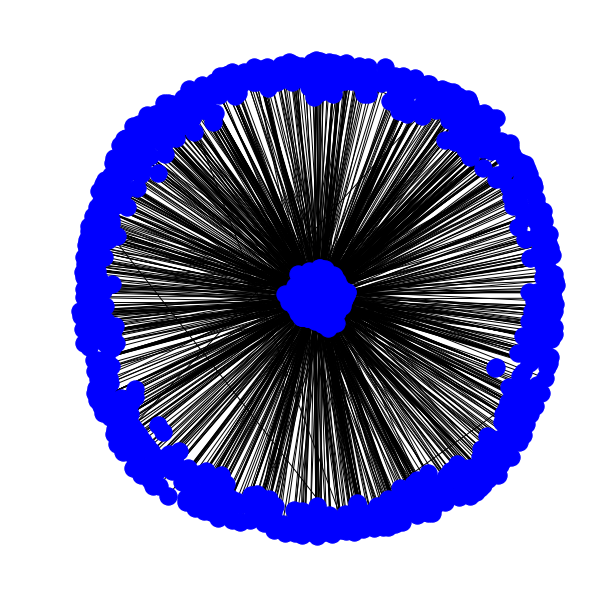

In [194]:
import matplotlib.pyplot as plt
nx.draw(Gwik,node_color='Blue')
plt.show()

The edges here represent the votes which are given by the source (voter) to the target (user running for election).

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (2 points)

In [195]:
df1['RES']=df['RES']
df1

df1.to_csv(path_or_buf='/Users/arnavshah/Downloads/da1.txt', sep=' ',index=False,header=False)

import networkx as nx
import numpy as np
Gwik1=nx.MultiGraph()

Gwik1=nx.read_edgelist('/Users/arnavshah/Downloads/da1.txt', create_using=nx.MultiGraph(),nodetype=int, data=[('weight',int),('att1',int)])

In [196]:
print(nx.info(Gwik1))
Gwik1.number_of_edges()
Gwik1.number_of_nodes()

Name: 
Type: MultiGraph
Number of nodes: 10437
Number of edges: 196614
Average degree:  37.6763


10437

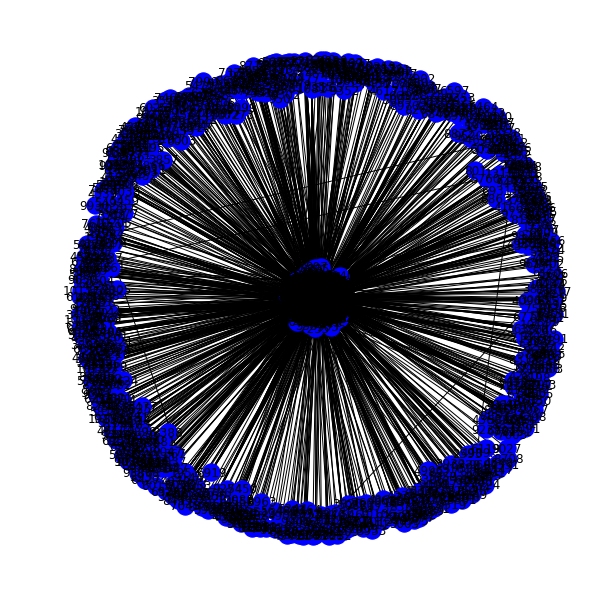

In [197]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
color_map=[]
if df1["RES"].any()==-1:
    color_map.append('black')
else:
    color_map.append('blue')
nx.draw(Gwik1, node_color=color_map,with_labels = True)
plt.show()

RES column was added here in the dataframe which already contained three columns. Here the RES column contains 1 and -1 as values so we can distinguish between these values from the graph as mentioned above on the basis of colors.

1 value  means the target was accepted and -1 value means the target was rejected.